In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

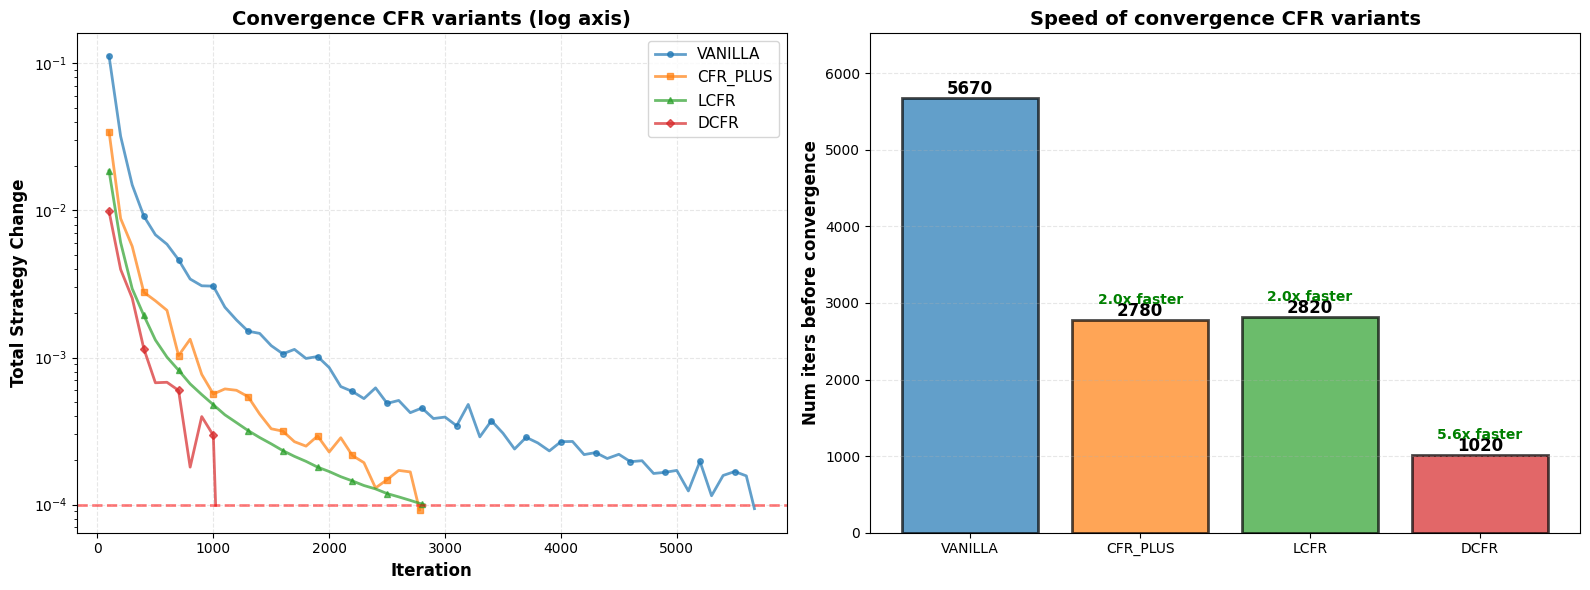

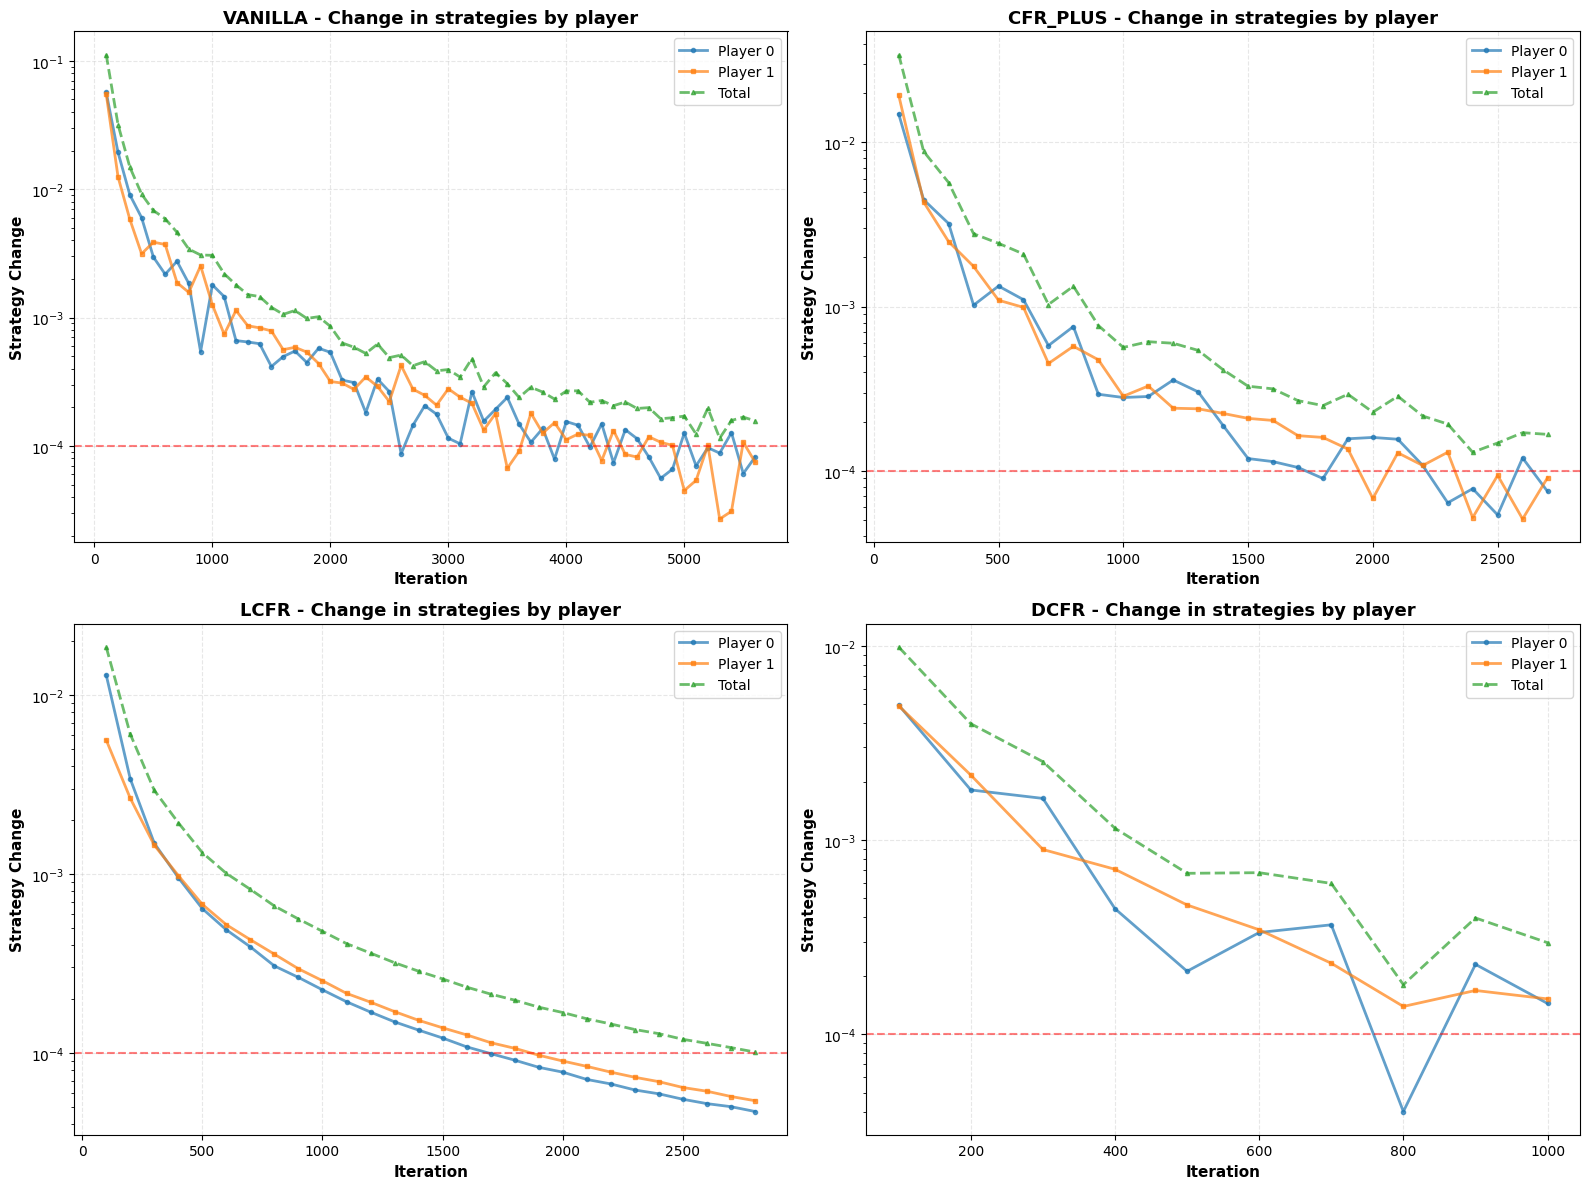

In [10]:
df = pd.read_csv('history.csv')

df_plot = df.dropna(subset=['Total_Change'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
variants = df_plot['Variant'].unique()
colors = {'VANILLA': '#1f77b4', 'CFR_PLUS': '#ff7f0e', 'LCFR': '#2ca02c', 'DCFR': '#d62728'}
markers = {'VANILLA': 'o', 'CFR_PLUS': 's', 'LCFR': '^', 'DCFR': 'D'}

for variant in variants:
    data = df_plot[df_plot['Variant'] == variant]
    ax1.plot(data['Iteration'], data['Total_Change'], 
             label=variant, color=colors[variant], marker=markers[variant],
             markersize=4, linewidth=2, alpha=0.7, markevery=3)

ax1.set_xlabel('Iteration', fontsize=12, fontweight='bold')
ax1.set_ylabel('Total Strategy Change', fontsize=12, fontweight='bold')
ax1.set_title('Convergence CFR variants (log axis)', fontsize=14, fontweight='bold')
ax1.set_yscale('log')
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.legend(fontsize=11, loc='upper right')
ax1.axhline(y=0.0001, color='red', linestyle='--', linewidth=2, alpha=0.5, label='Threshold (ε=0.0001)')

convergence_data = {
    'VANILLA': 5670,
    'CFR_PLUS': 2780,
    'LCFR': 2820,
    'DCFR': 1020
}

variants_list = list(convergence_data.keys())
iterations_list = list(convergence_data.values())
bar_colors = [colors[v] for v in variants_list]

bars = ax2.bar(variants_list, iterations_list, color=bar_colors, alpha=0.7, edgecolor='black', linewidth=2)
for bar, value in zip(bars, iterations_list):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(value)}',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

ax2.set_ylabel('Num iters before convergence', fontsize=12, fontweight='bold')
ax2.set_title('Speed of convergence CFR variants', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y', linestyle='--')
ax2.set_ylim(0, max(iterations_list) * 1.15)


baseline = convergence_data['VANILLA']
for i, (variant, iters) in enumerate(convergence_data.items()):
    if variant != 'VANILLA':
        speedup = baseline / iters
        ax2.text(i, iters + 200, f'{speedup:.1f}x faster',
                ha='center', fontsize=10, color='green', fontweight='bold')

plt.tight_layout()
plt.savefig('./photos/cfr_convergence_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


fig2, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, variant in enumerate(variants):
    data = df_plot[df_plot['Variant'] == variant].dropna(subset=['Player_0_Change', 'Player_1_Change'])
    
    axes[idx].plot(data['Iteration'], data['Player_0_Change'], 
                   label='Player 0', color='#1f77b4', marker='o', markersize=3, linewidth=2, alpha=0.7)
    axes[idx].plot(data['Iteration'], data['Player_1_Change'], 
                   label='Player 1', color='#ff7f0e', marker='s', markersize=3, linewidth=2, alpha=0.7)
    axes[idx].plot(data['Iteration'], data['Total_Change'], 
                   label='Total', color='#2ca02c', marker='^', markersize=3, linewidth=2, alpha=0.7, linestyle='--')
    
    axes[idx].set_xlabel('Iteration', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Strategy Change', fontsize=11, fontweight='bold')
    axes[idx].set_title(f'{variant} - Change in strategies by player', fontsize=13, fontweight='bold')
    axes[idx].set_yscale('log')
    axes[idx].grid(True, alpha=0.3, linestyle='--')
    axes[idx].legend(fontsize=10)
    axes[idx].axhline(y=0.0001, color='red', linestyle='--', linewidth=1.5, alpha=0.5)

plt.tight_layout()
plt.savefig('./photos/cfr_player_changes.png', dpi=300, bbox_inches='tight')
plt.show()